### Demo of a difference image from the akari sims

Simple demonstration of making a difference image, highlighting a fake SN. 

From Wang et al. 2021

In [1]:
%matplotlib inline

In [8]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS, utils as wcsutils
from astropy.table import Table

import os
import numpy as np
from glob import glob
from copy import deepcopy

from matplotlib import pyplot as plt, cm, spines


In [9]:
datadir = os.path.abspath("../data/imagesims")

In [10]:

im1file = os.path.join(datadir,'akari_match_Y106_3_1.fits')
im2file = os.path.join(datadir,'akari_match_Y106_30_1.fits')

im1 = fits.open(im1file)
im2 = fits.open(im2file)

In [11]:

im3sci = im1[0].data - im2[0].data

im3 = deepcopy(im1)
im3[0].data = im3sci

im3.writeto(os.path.join(datadir,"akari_match_Y106_diffim.fits"), overwrite=True)

In [12]:
def set_spine_color(ax, color):
    for child in ax.get_children():
        if isinstance(child, spines.Spine):
            child.set_color(color)
    ax.tick_params(axis='both', color='w', direction='inout', length=10)
    return

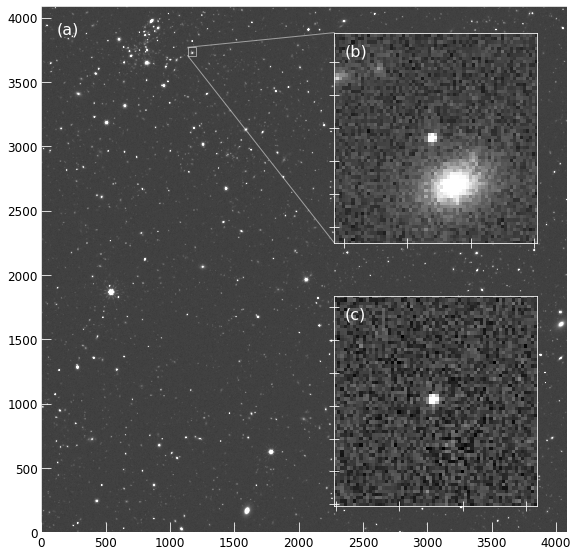

In [13]:
x0, y0 = 1169, 3737
zoom_width_arcsec = 10 
cmap = cm.Greys_r

# Convert the zoom window width from arcsec to pixels
wcsobj = WCS(im1[0].header)
dra, ddec = wcsutils.proj_plane_pixel_scales(wcsobj)
pixscale_arcsec = np.sqrt(dra**2 + ddec**2) * 3600
width = int(zoom_width_arcsec / pixscale_arcsec)

halfwidth=int(np.round(width/2.))
icutout = np.ix_(range(y0-halfwidth,y0+halfwidth),
                 range(x0-halfwidth,x0+halfwidth))

fig, ax = plt.subplots(figsize=[8, 8])

# show full frame
ax.imshow(im1[0].data, origin="lower", aspect='equal', vmin=-50, vmax=200, cmap=cmap)
set_spine_color(ax, 'w')
ax.tick_params(axis='both', labelsize='large', direction='in')

# inset axes....
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4])
axins.imshow(im1[0].data, origin="lower", aspect='equal', vmin=-50, vmax=200, cmap=cmap)


# define the sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x0-halfwidth, x0+halfwidth)
axins.set_ylim(y0-halfwidth, y0+halfwidth)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="white")
set_spine_color(axins, 'w')

axdiff = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axdiff.imshow(im3sci[icutout], origin="lower", aspect='equal', vmin=-50, vmax=200, cmap=cmap)
axdiff.set_xticklabels('')
axdiff.set_yticklabels('')
set_spine_color(axdiff, 'w')

axdiff.text(0.03,0.97, '(a)', color='w', ha='left', va='top', size=16, transform=ax.transAxes)
axdiff.text(0.05,0.95, '(b)', color='w', ha='left', va='top', size=16, transform=axins.transAxes)
axdiff.text(0.05,0.95, '(c)', color='w', ha='left', va='top', size=16, transform=axdiff.transAxes)


plt.tight_layout()
#plt.savefig("akari_diffim_demo.jpg")
#plt.savefig("akari_diffim_demo.pdf")
